In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [2]:
# nltk.download('wordnet') #to download all words listed in nltk corpus into our system
# nltk.download('punkt') #to download all punctuation listed in nltk corpus into our system
# nltk.download('averaged_perceptron_tagger') #to download part of speech of words

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saumy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saumy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\saumy\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Stemming and Lemmatization Explaination

In [3]:
ps=PorterStemmer()
wnl=WordNetLemmatizer()
token=['Going', 'replacement','loved', 'walking','walked','walks','ran','running']

stem=[ps.stem(w) for w in token]
print('stemmed word:',stem)

lem=[wnl.lemmatize(w) for w in token]
print('lemmatized words:',lem)


stemmed word: ['go', 'replac', 'love', 'walk', 'walk', 'walk', 'ran', 'run']
lemmatized words: ['Going', 'replacement', 'loved', 'walking', 'walked', 'walk', 'ran', 'running']


In [4]:
'''lemmatization did not work properly as it consider most of the words as noun itself. To let lemmatization understand the words 
properly and give correct lemma of word we need to give it the word its proper part of speecg for that we use nltk.pos tagger '''
def get_wordnet_pos(pos_tag):
        if pos_tag.startswith('J'):
            return wordnet.ADJ
        elif pos_tag.startswith('V'):
            return wordnet.VERB
        elif pos_tag.startswith('N'):
            return wordnet.NOUN
        elif pos_tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN

In [5]:
word_tag= nltk.pos_tag(token)
word_tag

[('Going', 'VBG'),
 ('replacement', 'NN'),
 ('loved', 'VBD'),
 ('walking', 'VBG'),
 ('walked', 'VBD'),
 ('walks', 'NNS'),
 ('ran', 'VBD'),
 ('running', 'VBG')]

In [6]:
for word,tag in word_tag:
    lem= wnl.lemmatize(word,pos=get_wordnet_pos(tag))
    print(lem)    

Going
replacement
love
walk
walk
walk
run
run


In [7]:
sent='Donald Trump has devoted following'.split()
x=[ps.stem(s) for s in sent]
print(x)

word_tag= nltk.pos_tag(sent)
for word, tag in word_tag:
    print(wnl.lemmatize(word,get_wordnet_pos(tag)))  
    
# we could see has is stem to ha but with lemmatization is get conversed to have
# non of the two is better than other its completely depend on which works better for your dataset

['donald', 'trump', 'ha', 'devot', 'follow']
Donald
Trump
have
devote
follow


# ML model and countvectorizer implimentation

In [8]:
df=pd.read_csv('bbc_text_cls.csv')

inputs=df['text']
labels=df['labels']

df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


<AxesSubplot:>

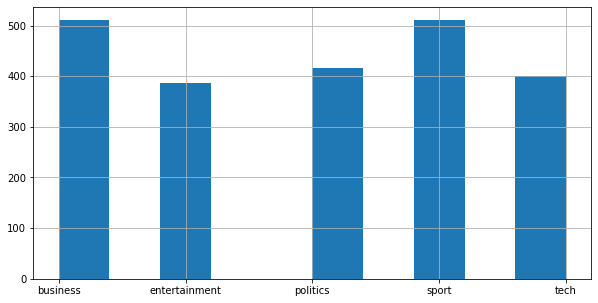

In [9]:
# to check if the data is balanced or not
labels.hist(figsize=(10,5))

In [10]:
x_train,x_test,y_train,y_test=train_test_split(inputs,labels,random_state=12)

In [11]:
vectorizer=CountVectorizer()

In [12]:
xtrain=vectorizer.fit_transform(x_train)
xtest=vectorizer.transform(x_test)

In [13]:
xtrain

<1668x25819 sparse matrix of type '<class 'numpy.int64'>'
	with 334621 stored elements in Compressed Sparse Row format>

In [14]:
# percentage of non-zero values
(xtrain!=0).sum()/np.product(xtrain.shape)

0.00776994114070067

In [15]:
model=MultinomialNB()
model.fit(xtrain,y_train)
print("Training Score",model.score(xtrain,y_train))
print("Training Score",model.score(xtest,y_test))

Training Score 0.9916067146282974
Training Score 0.9748653500897666


In [16]:
# With stopwords
vectorizer=CountVectorizer(stop_words='english')

xtrain=vectorizer.fit_transform(x_train)
xtest=vectorizer.transform(x_test)
print('training data dimension after removing stopwords:',xtrain.shape)

model.fit(xtrain,y_train)
print("Training Score",model.score(xtrain,y_train))
print("Training Score",model.score(xtest,y_test))


training data dimension after removing stopwords: (1668, 25528)
Training Score 0.9940047961630696
Training Score 0.9766606822262118


In [17]:
def LemmaTokenizer(x):
    token=word_tokenize(x)
    word_tag=nltk.pos_tag(token)
    for word, tag in word_tag:
        return(wnl.lemmatize(word,get_wordnet_pos(tag)))

In [18]:
#with lemmatization
vectorizer=CountVectorizer(tokenizer=LemmaTokenizer)

xtrain=vectorizer.fit_transform(x_train)
xtest=vectorizer.transform(x_test)
print('training data dimension after removing stopwords:',xtrain.shape)

model.fit(xtrain,y_train)
print("Training Score",model.score(xtrain,y_train))
print("Training Score",model.score(xtest,y_test))


training data dimension after removing stopwords: (1668, 34)
Training Score 0.37170263788968827
Training Score 0.3231597845601436


In [19]:
def StemTokenizer(x):
    token=word_tokenize(x)
    return(ps.stem(t) for t in token)

In [20]:
#with steming
vectorizer=CountVectorizer(tokenizer=StemTokenizer)

xtrain=vectorizer.fit_transform(x_train)
xtest=vectorizer.transform(x_test)
print('training data dimension after removing stopwords:',xtrain.shape)

model.fit(xtrain,y_train)
print("Training Score",model.score(xtrain,y_train))
print("Training Score",model.score(xtest,y_test))


training data dimension after removing stopwords: (1668, 22322)
Training Score 0.9910071942446043
Training Score 0.9694793536804309


In [21]:
def simple_token(s):
    return s.split()

In [22]:
#string simple tokenizer
vectorizer=CountVectorizer(tokenizer=simple_token)

xtrain=vectorizer.fit_transform(x_train)
xtest=vectorizer.transform(x_test)
print('training data dimension after removing stopwords:',xtrain.shape)

model.fit(xtrain,y_train)
print("Training Score",model.score(xtrain,y_train))
print("Training Score",model.score(xtest,y_test))


training data dimension after removing stopwords: (1668, 51130)
Training Score 0.9952038369304557
Training Score 0.9587073608617595
